In [5]:
#libraries for data handling
import pandas as pd # for working with tabular datas
import numpy as np #for numerical operations (arrays, math functions)

#libraries for data visualization
import matplotlib.pyplot as plt    # for basic plotting
import seaborn as sns              #for advanced statistical plots
import plotly.express as px      
import plotly.graph_objects as go  # interactive visualizations (zoomable, hoverable)
from pandas.plotting import parallel_coordinates #for visualizing multivariate data

#for data preprocessing
from sklearn.preprocessing import (
    RobustScaler, MinMaxScaler, 
    LabelEncoder, OneHotEncoder
)
#scales data while ignoring outliers
#normalizes values between 0 and 1
# converts text lables to numbers

#for model training and evaluation
from sklearn.model_selection import (
    train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)

#for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
#importing dataset
df = pd.read_csv(r'C:\Users\Dell\Credit Risk Modelling\credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [15]:
df.shape

(32581, 12)

In [16]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [18]:
df.isnull().sum() #checking for the count of null values

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [20]:
#Univariate Analysis
#Age Distribution
max_ = df['person_age'].max()
min_ = df['person_age'].min()
print("maximum Age: ",max_)
print("minimum Age: ",min_)

# defining age bins and labels
bins = [0,18,26,36,46,56,66,100]  #these are the cutoff points
labels = ['0-18', '19-26', '27-36', '37-46', '47-56', '57-66', '67+']

#creating a new column for age groups
df['age_group'] = pd.cut(df['person_age'], bins=bins, labels=labels, right=True)

# Count number of people in each group
age_counts = df['age_group'].value_counts().sort_index()

print("\nNumber of people in each age group:")
print(age_counts)


maximum Age:  144
minimum Age:  20

Number of people in each age group:
age_group
0-18         0
19-26    17829
27-36    11834
37-46     2360
47-56      434
57-66       98
67+         21
Name: count, dtype: int64


In [32]:
#income distribution
max_ = df['person_income'].max()
min_ = df['person_income'].min()
print("maximum Income: ",max_)
print("minimum Income: ",min_)

#defining income bins and labels
bins2 = [0,25000,50000,75000,100000, 150000, 200000]
labels2 = ['0-25000', '25001-50000', '50001-75000', '75001-100000', '100001-150000', '150000+']

#creating a new column for income groups
df['Income_group'] = pd.cut(df['person_income'], bins = bins2, labels = labels2, right = True)

# Count number of people in each group
income_counts = df['Income_group'].value_counts().sort_index()

print("\nNumber of people in each income group:")
print(income_counts)

maximum Income:  6000000
minimum Income:  4000

Number of people in each income group:
Income_group
0-25000           2469
25001-50000      11613
50001-75000       9622
75001-100000      4670
100001-150000     3070
150000+            690
Name: count, dtype: int64


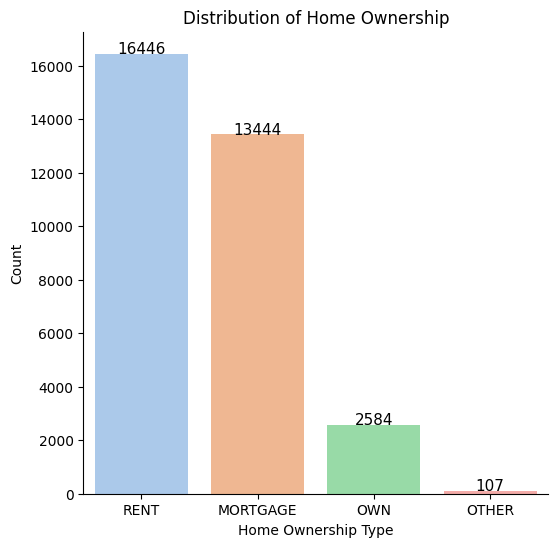

In [56]:
# Custom palette
palette = sns.color_palette("pastel", n_colors=df["person_home_ownership"].nunique())

#n_colors=df["person_home_ownership"].nunique() → ensures one unique color per category in person_home_ownership.

# Plot
plt.figure(figsize=(6,6))
ax = sns.countplot(
    data=df,
    x="person_home_ownership",
    order=df["person_home_ownership"].value_counts().index,
    palette=palette
)

# Add value labels
for p in ax.patches:
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=p.get_height() + 2,
        s=int(p.get_height()),
        ha='center',
        fontsize=11
    )

# Style
ax.set(title="Distribution of Home Ownership",
       xlabel="Home Ownership Type",
       ylabel="Count")
sns.despine()
plt.show()

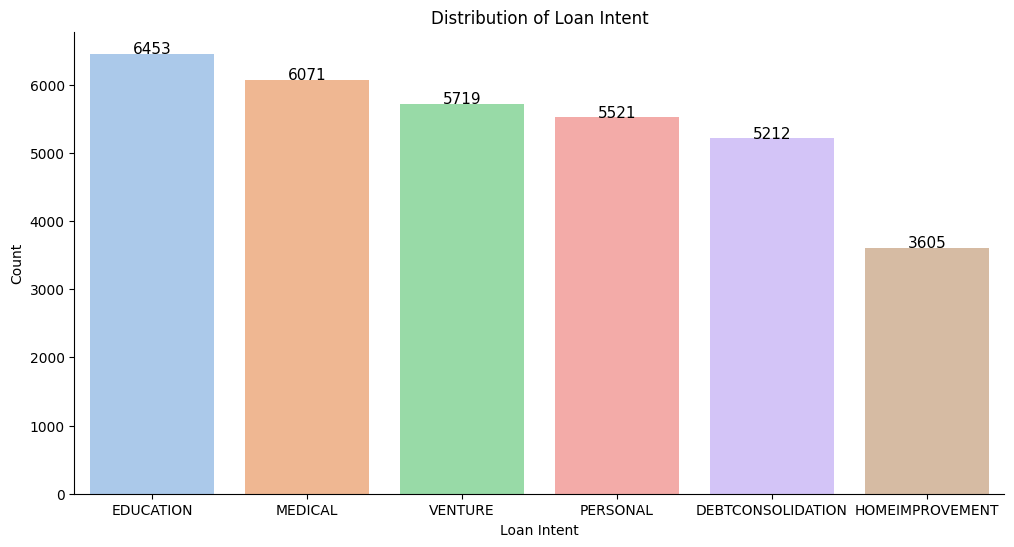

In [47]:
# Custom palette
palette = sns.color_palette("pastel", n_colors=df["loan_intent"].nunique())

#n_colors=df["loan_intent"].nunique() → ensures one unique color per category in person_home_ownership.

# Plot
plt.figure(figsize=(12,6))
ax = sns.countplot(
    data=df,
    x="loan_intent",
    order=df["loan_intent"].value_counts().index,
    palette=palette
)

# Add value labels
for p in ax.patches:
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=p.get_height() + 2,
        s=int(p.get_height()),
        ha='center',
        fontsize=11
    )

# Style
ax.set(title="Distribution of Loan Intent",
       xlabel="Loan Intent",
       ylabel="Count")
sns.despine()
plt.show()

In [29]:
max_loan_amount = df['loan_amnt'].max()
min_loan_amount = df['loan_amnt'].min()

print("maximum Loan Amount: ",max_loan_amount )
print("minimum Loan Amount: " ,min_loan_amount)

#defining loan amount bins and labels
bins3 = [0,5000,10000,15000,20000, 25000, 30000, 35000]
labels3 = ['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000','30001+']

#creating a new column for income groups
df['Loan_amount'] = pd.cut(df['loan_amnt'], bins = bins3, labels = labels3, right = True)

# Count number of people in each group
loan_amount_counts = df['Loan_amount'].value_counts().sort_index()

print("\nNumber of people in each loan amount group:")
print(loan_amount_counts)


maximum Loan Amount:  35000
minimum Loan Amount:  500

Number of people in each loan amount group:
Loan_amount
0-5000          9489
5001-10000     12040
10001-15000     6123
15001-20000     2789
20001-25000     1689
25001-30000      231
30001+           220
Name: count, dtype: int64


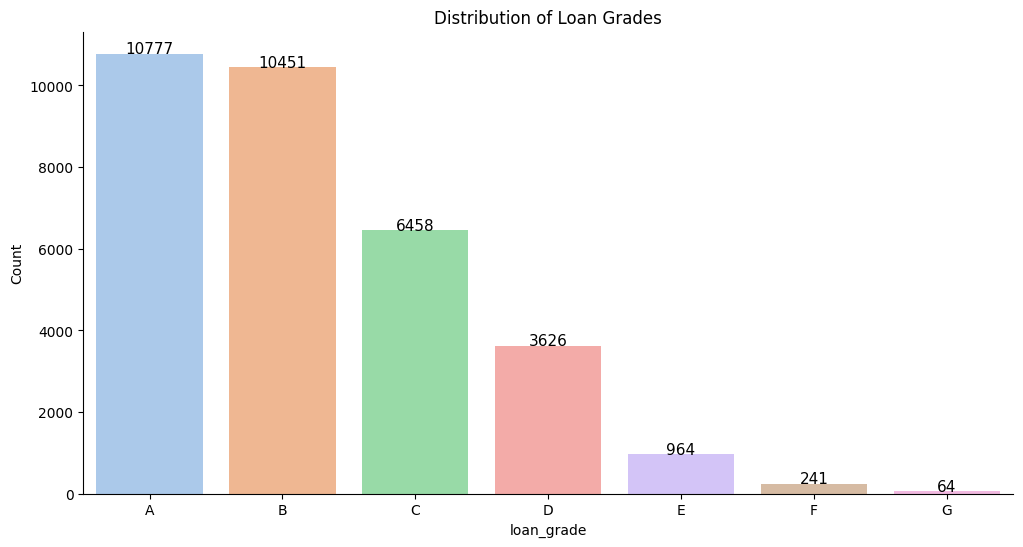

In [48]:
# Custom palette
palette = sns.color_palette("pastel", n_colors=df["loan_grade"].nunique())

#n_colors=df["loan_grade"].nunique() → ensures one unique color per category in person_home_ownership.

# Plot
plt.figure(figsize=(12,6))
ax = sns.countplot(
    data=df,
    x='loan_grade',
    order=df["loan_grade"].value_counts().index,
    palette=palette
)

# Add value labels
for p in ax.patches:
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=p.get_height() + 2,
        s=int(p.get_height()),
        ha='center',
        fontsize=11
    )

# Style
ax.set(title="Distribution of Loan Grades",
       xlabel="loan_grade",
       ylabel="Count")
sns.despine()
plt.show()

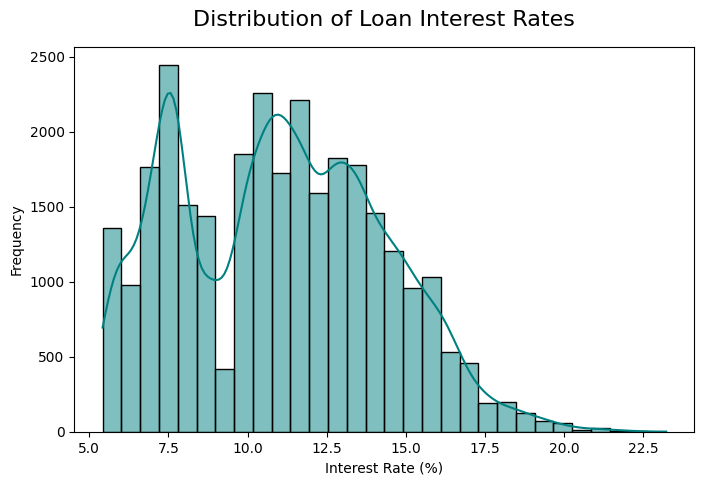

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(df["loan_int_rate"], kde=True, color="teal", bins=30)
plt.title("Distribution of Loan Interest Rates", fontsize=16, pad=15)
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.show()

In [8]:
#data pre-processing
#removal of duplicates
df.duplicated().sum()
df = df.drop_duplicates()
df.shape

(32416, 12)

In [37]:
#missing values
# Step 1: Import the KNN Imputer
from sklearn.impute import KNNImputer

# Step 2: Create the imputer object and tell it to look at 5 nearest rows
imputer = KNNImputer(n_neighbors=5)

# Step 3: Select the columns where we want to fill missing values
columns_to_impute = ['person_emp_length', 'loan_int_rate']

# Step 4: Fit the imputer on those columns and fill the missing values
imputed_values = imputer.fit_transform(df[columns_to_impute])

# Step 5: Put the filled values back into the same columns of the DataFrame
df[columns_to_impute] = imputed_values

#other ways to handle missing values
# df['person_emp_length'].fillna(0, inplace=True)
# df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)
# # or median:
# df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)
# # or most common value:
# df['loan_int_rate'].fillna(df['loan_int_rate'].mode()[0], inplace=True)

In [38]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [39]:
#data type conversion
# Convert all text (object) columns to category type
object_columns = df.select_dtypes(include='object').columns

for column in object_columns:
    df[column] = df[column].astype('category')

# Also make sure the target column is categorical
df['loan_status'] = df['loan_status'].astype('category')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31686 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  31686 non-null  float64 
 1   person_income               31686 non-null  float64 
 2   person_home_ownership       31686 non-null  category
 3   person_emp_length           31686 non-null  float64 
 4   loan_intent                 31686 non-null  category
 5   loan_grade                  31686 non-null  category
 6   loan_amnt                   31686 non-null  float64 
 7   loan_int_rate               31686 non-null  float64 
 8   loan_status                 31686 non-null  category
 9   loan_percent_income         31686 non-null  float64 
 10  cb_person_default_on_file   31686 non-null  category
 11  cb_person_cred_hist_length  31686 non-null  float64 
dtypes: category(5), float64(7)
memory usage: 3.1 MB


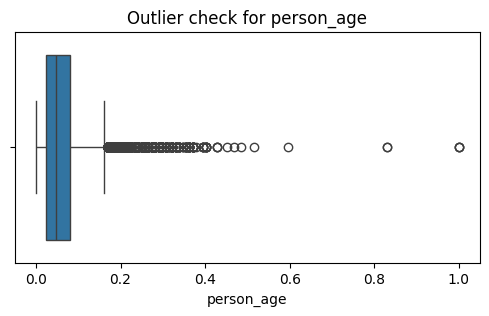

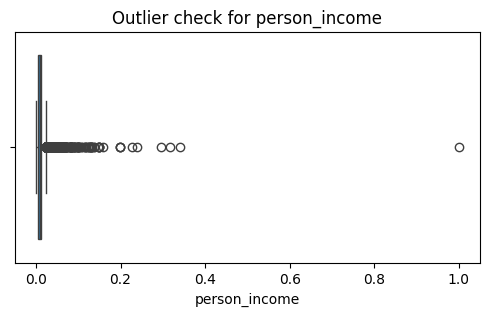

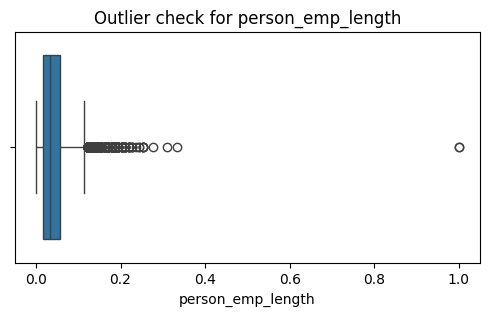

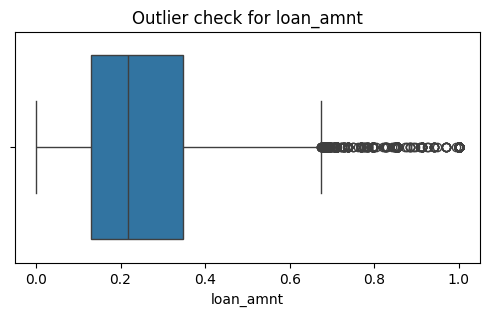

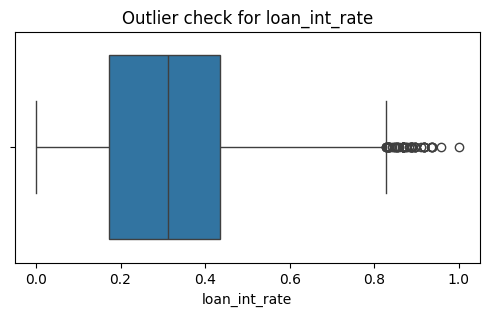

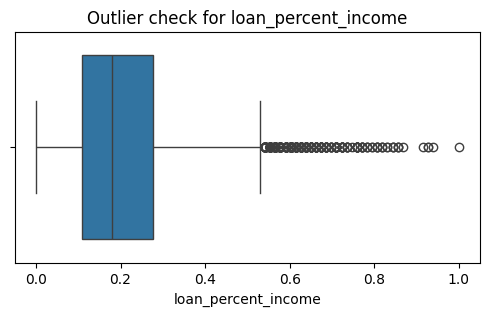

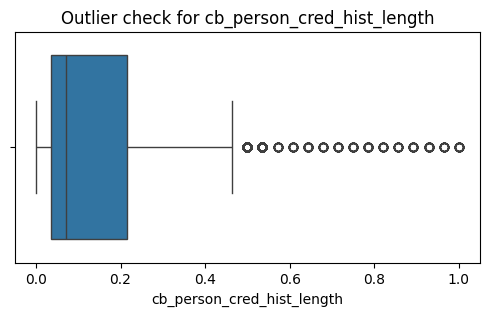

In [41]:
#handling outliers
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numeric_columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[column])
    plt.title("Outlier check for " + column)
    plt.show()


In [42]:
# Identify unrealistic rows
age_outliers = df[df['person_age'] > 120]
emp_outliers = df[df['person_emp_length'] > 50]
print("Age outliers:", len(age_outliers))
print("Employment length outliers:", len(emp_outliers))

# Remove them
df = df[df['person_age'] <= 120]
df = df[df['person_emp_length'] <= 50]

# Confirm removal
print("Remaining age outliers:", len(df[df['person_age'] > 120]))
print("Remaining emp_length outliers:", len(df[df['person_emp_length'] > 50]))

Age outliers: 0
Employment length outliers: 0
Remaining age outliers: 0
Remaining emp_length outliers: 0


In [11]:
# Numeric columns except target
numeric_columns = []
for columns in df.columns:
    if df[columns].dtype in ['int64', 'float64'] and columns != 'loan_status':
        numeric_columns.append(columns)

# Categorical columns
categorical_columns = []
for col in df.columns:
    if df[col].dtype in ['object', 'category']:
        categorical_columns.append(col)

print("Numerical columns:", numeric_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
Categorical columns: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [7]:
#encoding of categorical variables
# Step 1: Copy the dataframe (so the original stays safe)
df_encoded = df.copy()

# Step 2: Label Encoding for binary columns (Yes/No type)
le = LabelEncoder()
df_encoded['cb_person_default_on_file'] = le.fit_transform(df_encoded['cb_person_default_on_file'])
df_encoded['loan_status'] = le.fit_transform(df_encoded['loan_status'])

# Step 3: One-Hot Encoding for other categorical columns
df_encoded = pd.get_dummies(df_encoded, 
                            columns=['person_home_ownership', 'loan_intent', 'loan_grade'], 
                            drop_first=True)

# Step 4: Show the first 5 rows of new dataframe
print(df_encoded.head())

   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          22          59000              123.0      35000          16.02   
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   
4          24          54400                8.0      35000          14.27   

   loan_status  loan_percent_income  cb_person_default_on_file  \
0            1                 0.59                          1   
1            0                 0.10                          0   
2            1                 0.57                          0   
3            1                 0.53                          0   
4            1                 0.55                          1   

   cb_person_cred_hist_length  person_home_ownership_OTHER  ...  \
0                           3                        False  ...   
1     

In [12]:
#Feature Scaling of Numerical Variables
# Step 1: Backup original dataframe
df_raw = df.copy()

# Step 2: Scale numeric columns between 0 and 1
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df_encoded[numeric_columns] = df[numeric_columns]

#Step 3: Show the first 5 rows of new column
df[numeric_columns].head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,0.016129,0.009173,1.000000,1.000000,0.595506,0.710843,0.035714
1,0.008065,0.000934,0.040650,0.014493,0.321348,0.120482,0.000000
2,0.040323,0.000934,0.008130,0.144928,0.418539,0.686747,0.035714
3,0.024194,0.010257,0.032520,1.000000,0.551124,0.638554,0.000000
4,0.032258,0.008406,0.065041,1.000000,0.497191,0.662651,0.071429


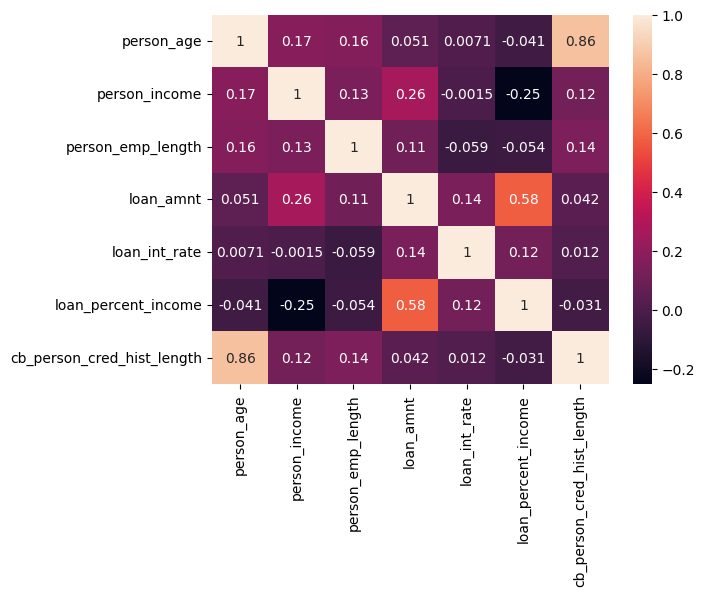

In [46]:
#Correlation Matrix
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [13]:
# Split features and target
X = df_encoded.drop(columns=['loan_status'])
y = df_encoded['loan_status']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric columns
scaler = MinMaxScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [9]:
df_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,35000,16.02,1,0.59,1,3,False,...,False,False,True,False,False,False,True,False,False,False
1,21,9600,5.0,1000,11.14,0,0.10,0,2,False,...,False,False,False,False,True,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,0,3,False,...,False,True,False,False,False,True,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,0,2,False,...,False,True,False,False,False,True,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,1,4,False,...,False,True,False,False,False,True,False,False,False,False


In [48]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

xgb = XGBClassifier(eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [49]:
# Step 1: Put all models in a dictionary
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf,
    "XGBoost": xgb
}

# Step 2: Create empty list to store results
results = []

# Step 3: Loop through models and calculate metrics
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Check if model supports probabilities for ROC-AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]  # probability of positive class
        roc = roc_auc_score(y_test, y_prob)
    else:
        roc = "N/A"
    
    # Calculate other metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append results as a dictionary
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": roc
    })

# Step 4: Convert list of results to DataFrame
results_df = pd.DataFrame(results)

# Step 5: Sort by F1-Score or Accuracy for easy comparison
results_df = results_df.sort_values(by="F1-Score", ascending=False)

# Step 6: Display results
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,XGBoost,0.937204,0.949763,0.743875,0.834305,0.944223
1,Random Forest,0.935469,0.956226,0.729770,0.827789,0.928044
2,Decision Tree,0.891606,0.731092,0.775056,0.752432,0.849059
3,Logistic Regression,0.872042,0.782105,0.551596,0.646931,0.860270


In [16]:
# Step 1: Import the required libraries
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Step 2: Define the possible parameter values (what we want to test)
# Think of this as a menu — the model will try different combinations
param_grid = {
    'n_estimators': [100, 200, 300],     # Number of trees
    'max_depth': [3, 5, 7],              # Depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],   # Speed of learning
    'subsample': [0.8, 1.0],             # Fraction of samples per tree
    'colsample_bytree': [0.8, 1.0]       # Fraction of features per tree
}

# Step 3: Create a base model (our main XGBoost model)
xgb_model = XGBClassifier(
    random_state=42, 
    eval_metric='logloss'   # Just tells it how to measure performance
)

# Step 4: Create the RandomizedSearchCV object
# This will test random combinations from our grid above
random_search = RandomizedSearchCV(
    estimator=xgb_model,         # Which model to tune
    param_distributions=param_grid,  # Which parameters to try
    n_iter=10,                   # Try 10 random combinations
    cv=3,                        # 3-fold cross-validation
    scoring='accuracy',          # Optimize for accuracy
    random_state=42,
    n_jobs=-1                    # Use all CPU cores (faster)
)

# Step 5: Fit (train) the model on our training data
random_search.fit(X_train, y_train)

# Step 6: Print the best results
print("Best Parameters Found:")
print(random_search.best_params_)

print("Best Accuracy Score:")
print(random_search.best_score_)

# Step 7: Get the best model and test it on the test data
best_xgb = random_search.best_estimator_

# Evaluate how well it performs on unseen test data
y_pred = best_xgb.predict(X_test)

# Quick accuracy check
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters Found:
{'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Accuracy Score:
0.9356967464702272
Test Accuracy: 0.9335583857603191


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.96      0.73      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.86      0.89      6517
weighted avg       0.94      0.93      0.93      6517



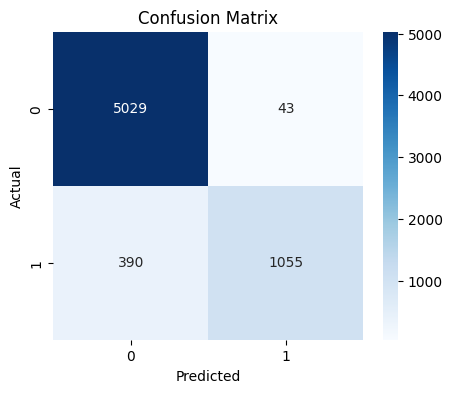

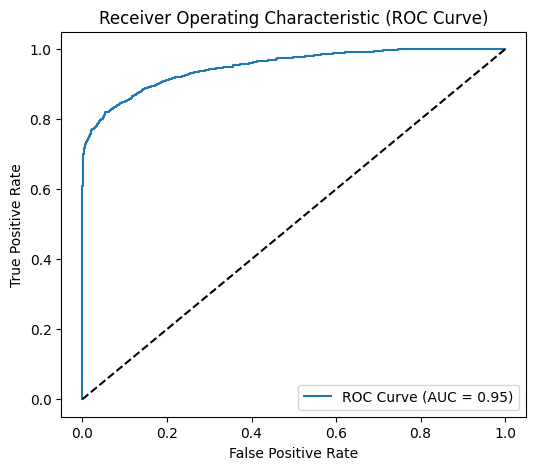

In [17]:
#evaluation of tuned model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

# 1. Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.legend()
plt.show()


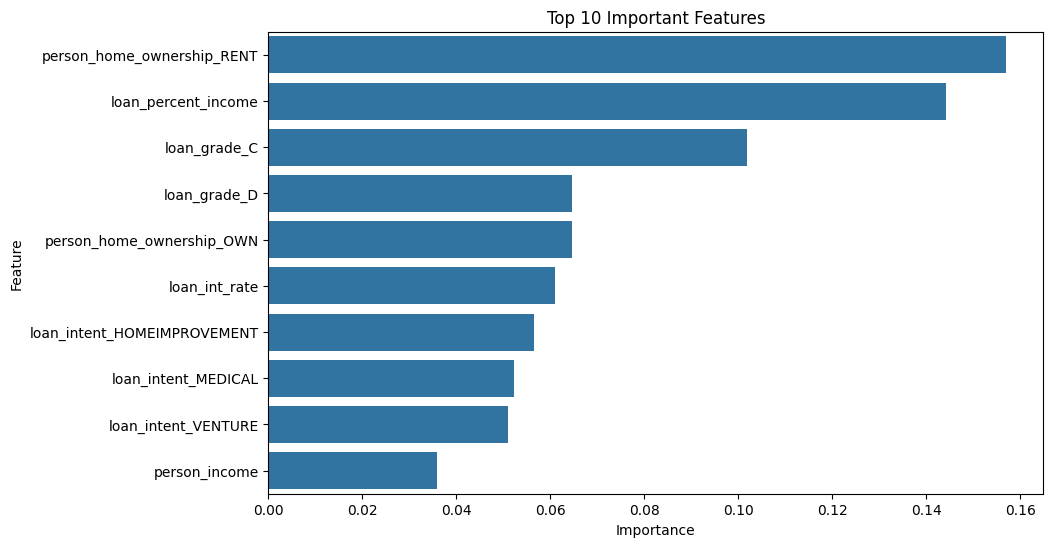

In [18]:
#feature importance
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Important Features")
plt.show()

In [19]:
#Saving the model
import joblib

# Save the model
joblib.dump(best_xgb, "best_xgb_model.pkl")

# Later, you can load it again:
# loaded_model = joblib.load("best_xgb_model.pkl")
# loaded_model.predict(X_new)


['best_xgb_model.pkl']